In [294]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/rec/dataset/Price.csv")

In [295]:
#不要なデータの除去
data = data.drop('id', axis=1)
data = data.drop('date', axis=1)

In [296]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [383]:
import torch 
import torch.nn as nn
from sklearn.model_selection import train_test_split
batch_size = 50
data_x = data.drop('price', axis=1)

In [384]:
data_y = data.price / data.price.max()
data_x = (data_x - data_x.mean()) / data_x.std()
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.4)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5)

In [385]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9548,-1.473925,-1.447430,-1.262901,-0.205381,-0.915406,-0.087171,-0.305752,-0.629172,-1.409554,-1.048666,-0.658666,-1.770483,4.776442,0.748718,-0.107189,-0.398383,-0.695300,-0.249942
7955,0.676469,0.175603,-0.293867,-0.181214,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,-0.855450,0.990772,0.510491,-0.210124,-1.026816,-1.979974,-1.023257,-0.607759,-0.189255
13683,1.751667,-1.447430,0.076325,5.966224,0.010539,-0.087171,-0.305752,-0.629172,-0.558823,0.436678,-0.658666,-2.417327,4.768974,-0.241843,-0.058836,2.917711,-0.768251,1.239391
17193,-0.398728,-0.473610,0.021885,-0.164386,-0.915406,-0.087171,-0.305752,0.907533,-0.558823,-0.674311,1.307103,-0.647018,-0.210124,1.645830,-0.721347,-1.037459,-0.418086,-0.070995
2364,0.676469,-0.473610,0.228758,-0.142248,-0.915406,-0.087171,-0.305752,2.444237,0.291909,-0.626007,1.646028,-0.068264,-0.210124,-0.952056,-0.196679,1.156702,0.442736,-0.094068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,0.676469,1.798635,1.851072,-0.177158,0.936484,-0.087171,-0.305752,-0.629172,1.142641,1.595971,0.855202,1.021157,-0.210124,-0.484811,0.945034,0.602836,1.930937,-0.176656
3612,0.676469,0.175603,0.065437,-0.138336,0.936484,-0.087171,-0.305752,0.907533,0.291909,0.424602,-0.658666,0.510491,-0.210124,0.262783,-2.130085,-0.029139,0.063391,-0.180282
17043,0.676469,0.500209,0.261422,-0.154174,0.936484,-0.087171,-0.305752,-0.629172,0.291909,0.641970,-0.658666,0.680713,-0.210124,-0.821228,1.245257,-0.085946,0.398966,-0.164827
15013,0.676469,-0.473610,-0.239427,-0.144734,-0.915406,-0.087171,-0.305752,0.907533,-0.558823,-0.819222,1.035962,-0.272530,-0.210124,-0.858607,-1.305194,-0.483593,-0.607759,-0.133916


In [386]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1439,-0.398728,-0.473610,-0.500740,-0.187756,-0.915406,-0.087171,-0.305752,0.907533,-0.558823,-0.843374,0.538871,0.101958,-0.210124,-0.821228,1.116797,0.006365,-0.884973,-0.204271
18421,-1.473925,-1.447430,-1.317341,-0.206539,-0.915406,-0.087171,-0.305752,-0.629172,-1.409554,-1.109046,-0.658666,-0.817240,-0.210124,1.029066,1.145664,-0.987753,-0.709890,-0.223059
12144,1.751667,0.500209,-0.152323,-0.138047,-0.915406,-0.087171,-0.305752,0.907533,-0.558823,-0.601855,0.810012,-0.374663,-0.210124,1.440242,1.326087,-0.810232,-0.257594,-0.123734
2800,0.676469,0.500209,-0.119659,-0.205381,0.936484,-0.087171,-0.305752,-0.629172,-0.558823,0.219311,-0.658666,0.544535,-0.210124,-0.895987,-1.522423,0.325903,-0.024150,-0.186289
125,0.676469,0.824816,0.729606,0.064751,0.010539,-0.087171,-0.305752,-0.629172,0.291909,0.231387,1.081152,-1.940705,4.749057,-1.381923,0.390055,0.013466,1.566182,-0.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14865,2.826864,1.798635,1.785744,-0.082495,0.936484,-0.087171,-0.305752,-0.629172,1.993372,2.332605,-0.658666,1.089246,-0.210124,-0.709089,0.071068,-0.085946,1.522411,-0.039644
11623,-1.473925,-0.149004,-0.990700,-0.319092,0.010539,-0.087171,0.999190,0.907533,0.291909,-0.746767,-0.658666,-1.498128,-0.210124,0.767408,0.578416,-1.115568,0.253063,-0.321140
11323,0.676469,0.175603,0.381190,-0.122088,0.936484,-0.087171,-0.305752,0.907533,0.291909,0.774805,-0.658666,0.272180,-0.210124,-1.344543,-0.027082,0.361407,0.588638,-0.092237
7423,0.676469,1.798635,1.219567,-0.170398,-0.915406,-0.087171,-0.305752,-0.629172,0.291909,1.100856,0.471086,0.306225,-0.210124,-1.363233,0.173548,0.297500,-0.505627,-0.156110


In [387]:
Y_train

9548     0.054156
7955     0.038955
13683    0.071429
17193    0.043506
2364     0.064935
           ...   
6633     0.101558
3612     0.041883
17043    0.073052
15013    0.034416
4370     0.063636
Name: price, Length: 12967, dtype: float64

In [388]:
Y_test

1439     0.059610
18421    0.031169
12144    0.038831
2800     0.035701
125      0.188312
           ...   
14865    0.197403
11623    0.079610
11323    0.107143
7423     0.121442
9978     0.098052
Name: price, Length: 4323, dtype: float64

In [389]:
import numpy as np
#学習に用いるためpytorchのTensor化
x_train = torch.from_numpy(np.array(X_train)).float()
y_train = torch.from_numpy(np.array(Y_train)).float()
x_val = torch.from_numpy(np.array(X_val)).float()
y_val = torch.from_numpy(np.array(Y_val)).float()
x_test = torch.from_numpy(np.array(X_test)).float()
y_test = torch.from_numpy(np.array(Y_test)).float()


print(x_train.size(), x_val.size(), x_test.size())

torch.Size([12967, 18]) torch.Size([4323, 18]) torch.Size([4323, 18])


In [390]:
input_features = 18
layer1_neurons = 9
layer2_neurons = 6
layer3_neurons = 1
#モデルの構築

class DL(nn.Module):
  def __init__(self):
    super(DL, self).__init__()

    self.relu = nn.Softplus()
    self.sigmoid = nn.Sigmoid()
    self.tanh = nn.Tanh()

    self.layer1 = nn.Linear(input_features, layer1_neurons)
    self.layer2 = nn.Linear(layer1_neurons, layer2_neurons)
    self.out = nn.Linear(layer2_neurons, layer3_neurons)
  
  def forward(self, x):
    x = x.view(-1, 18)
    x = self.tanh(self.layer1(x))
    x = self.tanh(self.layer2(x))
    x = self.relu(self.out(x))
    return x

model = DL()
model
    

DL(
  (relu): Softplus(beta=1, threshold=20)
  (sigmoid): Sigmoid()
  (tanh): Tanh()
  (layer1): Linear(in_features=18, out_features=9, bias=True)
  (layer2): Linear(in_features=9, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=1, bias=True)
)

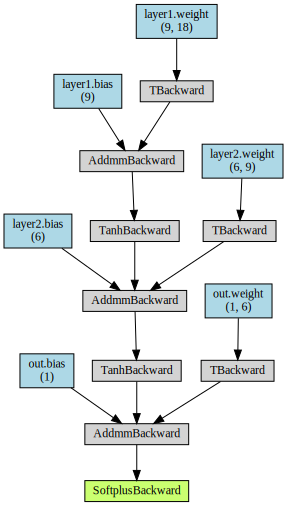

In [391]:
x = x_train[:5]
y = model(x)
!pip install torchviz
#モデルの概略図
import torchviz
from torchviz import make_dot
make_dot(y, params=dict(model.named_parameters()))

In [392]:
#最適化手法、学習率の設定
import torch.optim as optim
lr = 0.1
weight_decay = 10**(-8)

optimizer = optim.SGD(
    model.parameters(),
    lr = lr,
    weight_decay = weight_decay
)

In [393]:
#使用する誤差関数
criterion = nn.MSELoss()

In [394]:
def train_step(x_train, y_train):
  model.train()

  pred_y = model(x_train)
  optimizer.zero_grad()
  loss = criterion(pred_y, y_train)
  loss.backward()
  optimizer.step()
  y = y_train.detach().clone().numpy()
  pred_y = pred_y.detach().clone().numpy()
  return loss.item(), y, pred_y

def val_step(x_val, y_val):
  model.eval()

  pred_y = model(x_val)
  loss = criterion(pred_y, y_val)
  y = y_val.detach().clone().numpy()
  pred_y = pred_y.detach().clone().numpy()

  return loss.item(), y, pred_y

In [395]:
def init_parameters(layer):
  if type(layer) == nn.Linear:
    nn.init.xavier_uniform_(layer.weight) #重みを一様ランダム値に初期化
    layer.bias.data.fill_#バイアスを０に初期化

model.apply(init_parameters)

#エポック数の指定
EPOCHS = 300
train_history = []
val_history = []
R2_train_history = []
R2_val_history = []
for epoch in range(EPOCHS):
  total_loss_train = 0
  total_loss_val = 0
  R2_score_train = 1.0
  R2_score_val = 1.0
  y_index_train = []
  y_index_val = []
  r2_bumbo_train = 0
  r2_bunshi_train = 0
  y_mean_train = 0
  r2_bumbo_val = 0
  r2_bunshi_val = 0
  y_mean_val = 0

  for i in range(batch_size):
    n_val = np.random.randint(0, high=len(x_val))
    val_x, val_y = x_val[n_val], y_val[n_val]
    loss_val, y, pred_y = val_step(val_x, val_y)
    total_loss_val += loss_val
    y_mean_val += y/batch_size
    r2_bunshi_val += (y - pred_y)**2
    y_index_val.append(y)


  for i in range(batch_size):
    y = y_index_val[i]
    r2_bumbo_val += (y - y_mean_val)**2
    

  R2_score_val -= (r2_bunshi_val/r2_bumbo_val)
  R2_val_history.append(R2_score_val)

  for i in range(batch_size):
    n_train = np.random.randint(0, high=len(x_train))
    train_x, train_y = x_train[n_train], y_train[n_train]
    loss_train, y, pred_y = train_step(train_x, train_y)
    total_loss_train += loss_train
    y_mean_train += y/batch_size
    r2_bunshi_train += (y - pred_y)**2
    y_index_train.append(y)

  for i in range(batch_size):
    y = y_index_train[i]
    r2_bumbo_train += (y - y_mean_train)**2

  R2_score_train -= (r2_bunshi_train/r2_bumbo_train)
  R2_train_history.append(R2_score_train)

  

  train_history.append(total_loss_train/batch_size)
  val_history.append(total_loss_val/batch_size)
  
  if epoch % 10 == 0:
    print("epoch: ",epoch)
    print("train_loss: ",total_loss_train/batch_size)
    print("val_loss: ",total_loss_val/batch_size)
    print("R2_train: ",R2_score_train)
    print("R2_val: ",R2_score_val)
    print('//////////////')

print(model.state_dict())
R2_train_history = np.reshape(R2_train_history, (EPOCHS, ))
R2_val_history = np.reshape(R2_val_history, (EPOCHS, ))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:  0
train_loss:  0.10540708784479648
val_loss:  0.6628194072842598
R2_train:  [[-224.60173]]
R2_val:  [[-305.71]]
//////////////
epoch:  10
train_loss:  0.001666795775839205
val_loss:  0.0018105853387305616
R2_train:  [[-0.02619219]]
R2_val:  [[-0.79742074]]
//////////////
epoch:  20
train_loss:  0.0028504193516520004
val_loss:  0.0007401685103207001
R2_train:  [[0.4401971]]
R2_val:  [[0.11118954]]
//////////////
epoch:  30
train_loss:  0.006507808898868603
val_loss:  0.0007830247873781104
R2_train:  [[0.35958487]]
R2_val:  [[0.6565762]]
//////////////
epoch:  40
train_loss:  0.0012054713649740734
val_loss:  0.0007071340387281566
R2_train:  [[0.3666824]]
R2_val:  [[0.5878122]]
//////////////
epoch:  50
train_loss:  0.0010908040486680192
val_loss:  0.0011924949374530925
R2_train:  [[0.12546659]]
R2_val:  [[0.61743605]]
//////////////
epoch:  60
train_loss:  0.00321566486565267
val_loss:  0.0006641447291785596
R2_train:  [[0.47165912]]
R2_val:  [[0.62771225]]
//////////////
epoch: 

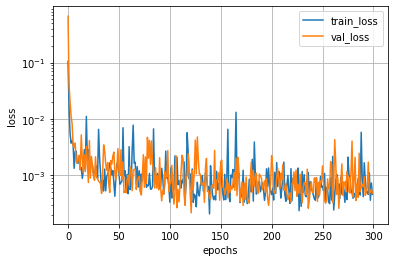

In [396]:
import matplotlib.pyplot as plt

#lossの推移、縦軸は対数指定
ax = plt.gca()
ax.set_yscale('log')  
plt.plot(train_history, marker=' ', label='train_loss')
plt.plot(val_history, marker=' ', label='val_loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

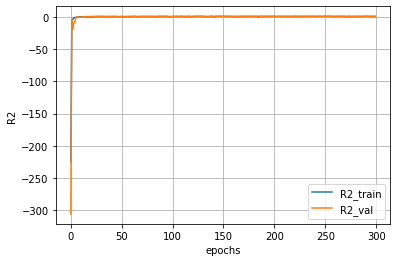

In [403]:
import matplotlib.pyplot as plt

#R2スコアの推移
plt.plot(R2_train_history, marker=' ', label='R2_train')
plt.plot(R2_val_history, marker=' ', label='R2_val')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('R2')
plt.legend()
plt.show()

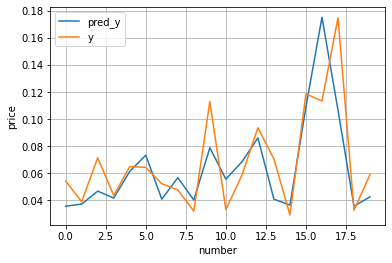

In [398]:
#訓練データに対するフィティングの評価
ys = []
pred_ys = []
for n in range(20):
  x = x_train[n]
  y = y_train[n]
  pred_y = model(x)
  pred_y = pred_y.view(1,)
  y = y.detach().clone().numpy()
  pred_y = pred_y.detach().clone().numpy()
  ys.append(y)
  pred_ys.append(pred_y)

plt.plot(pred_ys, marker=' ', label='pred_y')
plt.plot(ys, marker=' ', label='y')
plt.grid()
plt.xlabel('number')
plt.ylabel('price')
plt.legend()
plt.show()

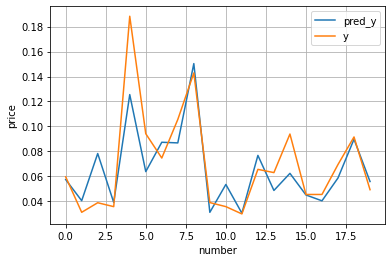

In [399]:
#テストデータに対するフィッティングの評価
ys = []
pred_ys = []
for n in range(20):
  x = x_test[n]
  y = y_test[n]
  pred_y = model(x)
  pred_y = pred_y.view(1,)
  y = y.detach().clone().numpy()
  pred_y = pred_y.detach().clone().numpy()
  ys.append(y)
  pred_ys.append(pred_y)

plt.plot(pred_ys, marker=' ', label='pred_y')
plt.plot(ys, marker=' ', label='y')
plt.grid()
plt.xlabel('number')
plt.ylabel('price')
plt.legend()
plt.show()

In [400]:
#誤差率の絶対値の評価
for i in range(20):
  n = np.random.randint(0, high=len(x_test))
  x = x_test[n]
  y = y_test[n]
  pred_y = model(x)
  pred_y = pred_y.view(1,)
  y = y.detach().clone().numpy()
  pred_y = pred_y.detach().clone().numpy()
  print("y : ", int(y*data.price.max()), ", pred_y : ", int(pred_y*data.price.max()), ", diff : ", int(100 * (abs(int(y*data.price.max()) - int(pred_y*data.price.max())))/ int(y*data.price.max())), "%")

y :  339999 , pred_y :  469157 , diff :  37 %
y :  558000 , pred_y :  388014 , diff :  30 %
y :  549000 , pred_y :  554032 , diff :  0 %
y :  414949 , pred_y :  460738 , diff :  11 %
y :  302000 , pred_y :  332639 , diff :  10 %
y :  669999 , pred_y :  519586 , diff :  22 %
y :  374999 , pred_y :  570947 , diff :  52 %
y :  540000 , pred_y :  492176 , diff :  8 %
y :  511555 , pred_y :  388449 , diff :  24 %
y :  440000 , pred_y :  434408 , diff :  1 %
y :  252999 , pred_y :  310095 , diff :  22 %
y :  694999 , pred_y :  531047 , diff :  23 %
y :  492000 , pred_y :  367895 , diff :  25 %
y :  379999 , pred_y :  322849 , diff :  15 %
y :  1730000 , pred_y :  1163190 , diff :  32 %
y :  620000 , pred_y :  644320 , diff :  3 %
y :  299000 , pred_y :  602612 , diff :  101 %
y :  309900 , pred_y :  328909 , diff :  6 %
y :  1794999 , pred_y :  942744 , diff :  47 %
y :  606999 , pred_y :  590471 , diff :  2 %


In [401]:
#平均誤差率
#R2score
#平均二乗誤差
#平均二乗平方根誤差
error_rate = 0
R2_score = 1.0
y_mean = np.mean(y_test.detach().clone().numpy())
r2_bumbo = 0
r2_bunshi = 0
MAE = 0
RMSE = 0
for i in range(len(x_test)):
  x = x_test[i]
  y = y_test[i]
  pred_y = model(x)
  pred_y = pred_y.view(1,)
  y = y.detach().clone().numpy()
  pred_y = pred_y.detach().clone().numpy()
  error_rate_i = (100 * (abs(int(y*data.price.max()) - int(pred_y*data.price.max())))/ int(y*data.price.max()))
  MAE_i = (abs(int(y*data.price.max()) - int(pred_y*data.price.max())))
  RMSE_i = MAE_i ** 2
  error_rate += error_rate_i
  MAE += MAE_i
  RMSE += RMSE_i
  r2_bunshi_i = (y - pred_y)**2
  r2_bumbo_i = (y - y_mean)**2
  
  r2_bumbo += r2_bumbo_i
  r2_bunshi += r2_bunshi_i

MAE = MAE / len(x_test)
RMSE = (RMSE / len(x_test))**(0.5)
mean_error_rate = error_rate / len(x_test)
R2_score = 1 - (r2_bunshi/r2_bumbo)
R2_score = np.reshape(R2_score, (1, ))
print("mean_error_rate :",int(mean_error_rate), " %")
print("R2_score : ",R2_score)
print("MAE : ", MAE)
print("RMSE : ", RMSE)

mean_error_rate : 24  %
R2_score :  [0.6078636]
MAE :  135447.693962526
RMSE :  241691.66397485996
